#### Reading an Image

In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

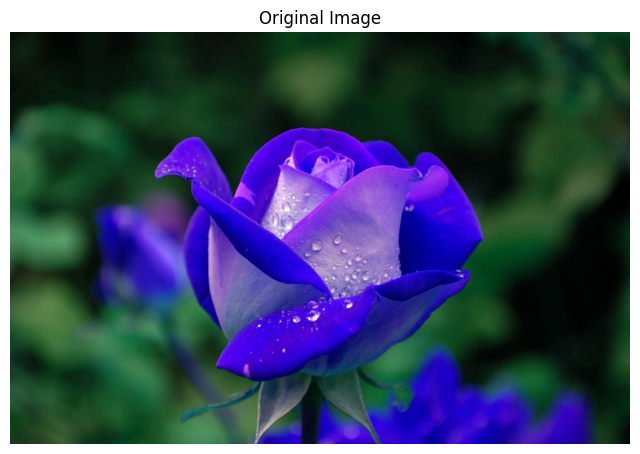

In [3]:


img = cv2.imread('flower.jpeg')  # Replace with your image path

if img is None:
    print("Error: Image not loaded correctly or path incorrect.")
else:
    # Resize image to a specific width and height
    scale_percent = 50  # percent of original size
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)

    resized_img = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)

    # Display the grayscale image using Matplotlib
    plt.figure(figsize=(8, 6))
    plt.imshow(img, cmap='gray')
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.title('Original Image')
    plt.show()


#### Converting the image to grayscale

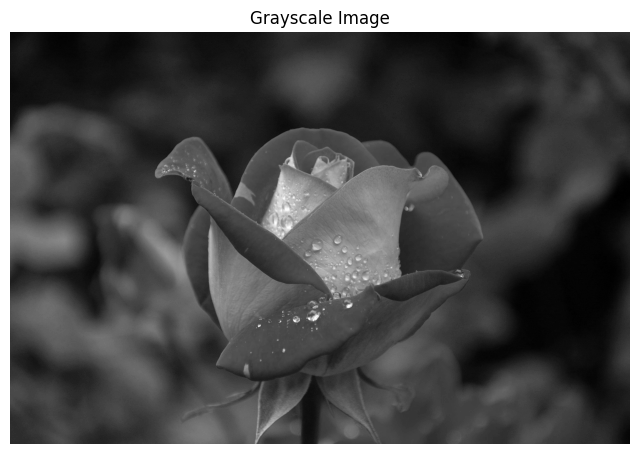

In [4]:

# Load the original image
img = cv2.imread('flower.jpeg')  # Replace with your image path

# Check if image was loaded correctly
if img is None:
    print("Error: Image not loaded correctly or path incorrect.")
else:
    # Convert the image to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Display the grayscale image using Matplotlib
    plt.figure(figsize=(8, 6))
    plt.imshow(gray_img, cmap='gray')
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.title('Grayscale Image')
    plt.show()


#### Add 22 pixels to the image using np.clip()

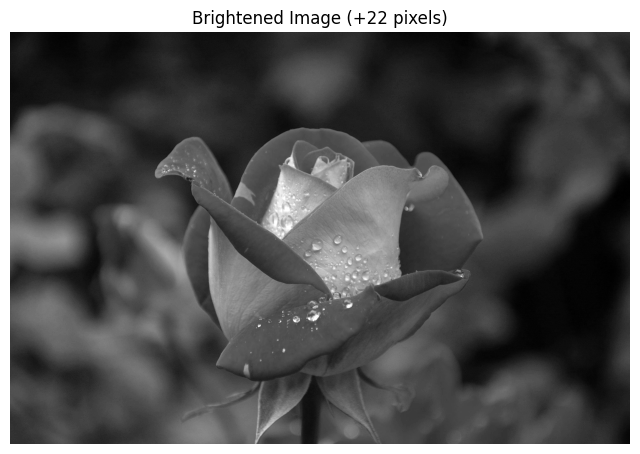

In [5]:
# gray_img = cv2.imread('path_to_your_grayscale_image.jpg', cv2.IMREAD_GRAYSCALE)

# Add 22 pixels to each pixel value to brighten the image
brightened_img = np.clip(gray_img.astype(int) + 22, 0, 255).astype(np.uint8)

# Display the brightened image using Matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(brightened_img, cmap='gray')
plt.axis('off')  # Turn off axis numbers and ticks
plt.title('Brightened Image (+22 pixels)')
plt.show()

#### Adding 22 pixels to the image using cv2.add()

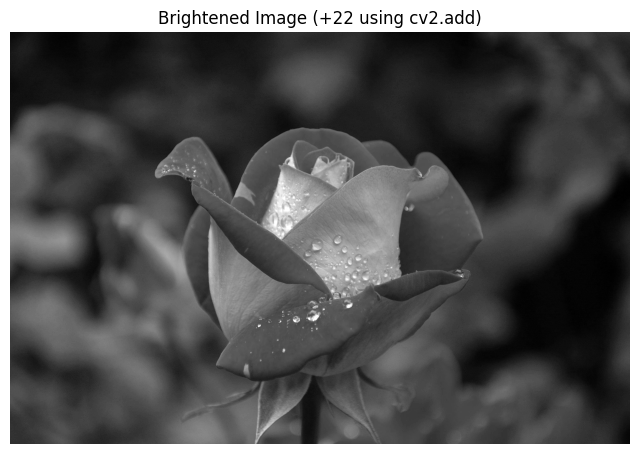

In [6]:

# Assuming gray_img is already loaded from previous steps
# If not, load your grayscale image here
# gray_img = cv2.imread('path_to_your_grayscale_image.jpg', cv2.IMREAD_GRAYSCALE)

# Add 22 to each pixel value to brighten the image using cv2.add()
brightened_img = cv2.add(gray_img, 22)

# Display the brightened image using Matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(brightened_img, cmap='gray')
plt.axis('off')  # Turn off axis numbers and ticks
plt.title('Brightened Image (+22 using cv2.add)')
plt.show()


#### Image Negative Implementation

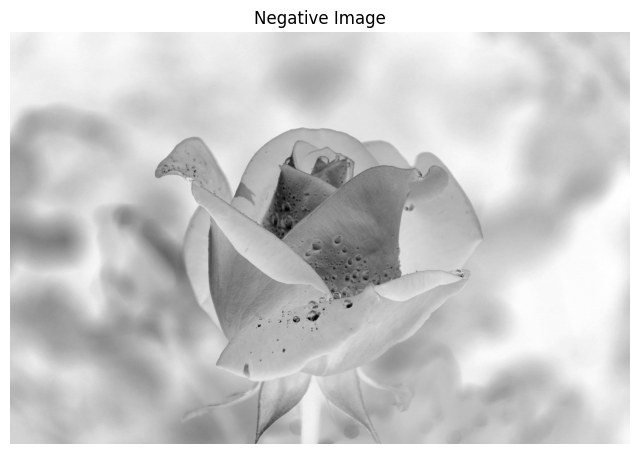

In [7]:

# Assuming gray_img is already loaded from previous steps
# If not, load your grayscale image here
# gray_img = cv2.imread('path_to_your_grayscale_image.jpg', cv2.IMREAD_GRAYSCALE)

# Calculate the negative image
negative_img = 255 - gray_img

# Display the negative image using Matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(negative_img, cmap='gray')
plt.axis('off')  # Turn off axis numbers and ticks
plt.title('Negative Image')
plt.show()


#### Gamma Values added

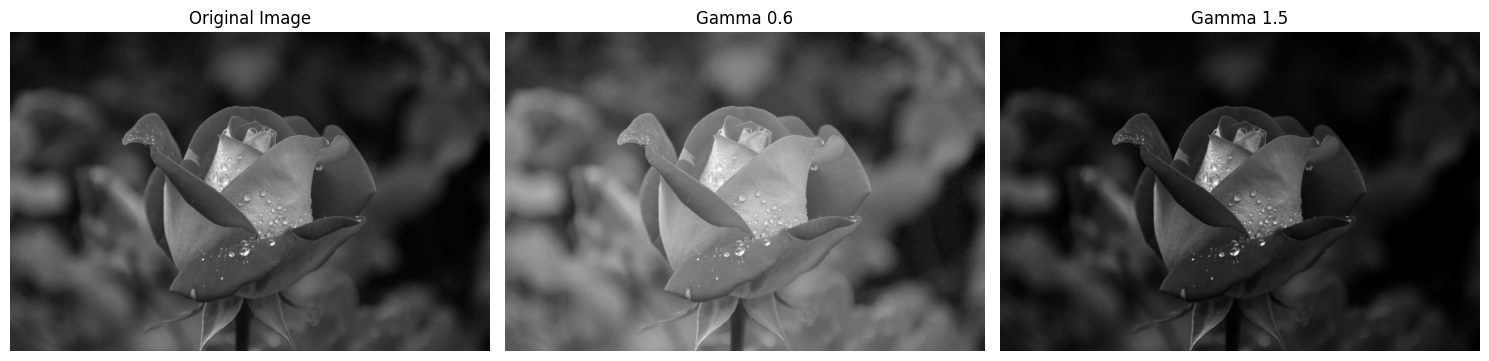

In [8]:
# Function to apply gamma correction
def apply_gamma_correction(image, gamma):
    # Normalize the image to the range [0, 1]
    normalized = image / 255.0
    # Apply gamma correction
    corrected = np.power(normalized, gamma)
    # Scale back to the range [0, 255]
    corrected = np.uint8(corrected * 255)
    return corrected

# Load a grayscale image
image = cv2.imread('flower.jpeg', cv2.IMREAD_GRAYSCALE)

# Apply gamma correction with gamma = 0.6
gamma_0_6 = apply_gamma_correction(image, 0.6)

# Apply gamma correction with gamma > 1 (e.g., gamma = 1.5)
gamma_1_5 = apply_gamma_correction(image, 1.5)

# Display the images using Matplotlib
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(gamma_0_6, cmap='gray')
axes[1].set_title('Gamma 0.6')
axes[1].axis('off')

axes[2].imshow(gamma_1_5, cmap='gray')
axes[2].set_title('Gamma 1.5')
axes[2].axis('off')

plt.tight_layout()
plt.show()


#### All combined

1) Read the image
2) convert to grayscale
3) add -22 pixels to the image
4) convert to negative image
5) add 1.5 gamma value to the image

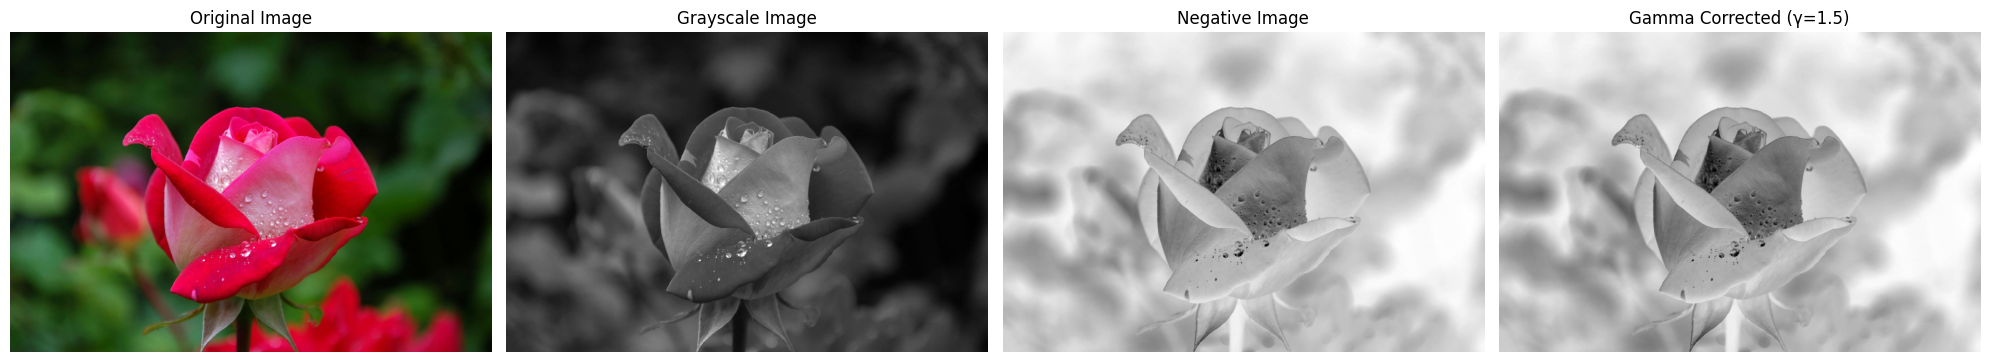

In [9]:
# Function to apply gamma correction
def apply_gamma_correction(image, gamma):
    # Normalize the image to the range [0, 1]
    normalized = image / 255.0
    # Apply gamma correction
    corrected = np.power(normalized, gamma)
    # Scale back to the range [0, 255]
    corrected = np.uint8(corrected * 255)
    return corrected

# Load the original image
image = cv2.imread('flower.jpeg')

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Reduce pixel values
reduced_image = gray_image // 2  # Example of reducing pixel values

# Create a negative image
negative_image = 255 - reduced_image

# Apply gamma correction with gamma = 1.5
gamma_corrected_image = apply_gamma_correction(negative_image, 1.5)

# Display the images using Matplotlib
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(gray_image, cmap='gray')
axes[1].set_title('Grayscale Image')
axes[1].axis('off')

axes[2].imshow(negative_image, cmap='gray')
axes[2].set_title('Negative Image')
axes[2].axis('off')

axes[3].imshow(gamma_corrected_image, cmap='gray')
axes[3].set_title('Gamma Corrected (γ=1.5)')
axes[3].axis('off')

plt.tight_layout()
plt.show()


#### Contrast Stretching


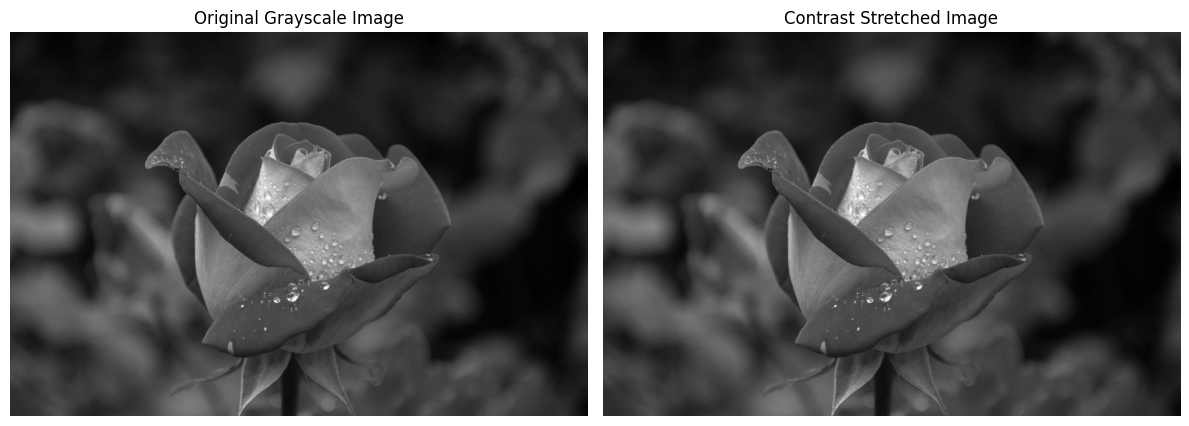

In [10]:
# Load the original image
image = cv2.imread('flower.jpeg')

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Find the minimum and maximum pixel values in the grayscale image
min_val = np.min(gray_image)
max_val = np.max(gray_image)

# Initialize an empty array for the contrast-stretched image
stretched_image = np.zeros_like(gray_image)

# Apply contrast stretching using two for loops
for i in range(gray_image.shape[0]):
    for j in range(gray_image.shape[1]):
        stretched_image[i, j] = (gray_image[i, j] - min_val) * 255 / (max_val - min_val)

# Display the original and contrast-stretched images using Matplotlib
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(gray_image, cmap='gray')
axes[0].set_title('Original Grayscale Image')
axes[0].axis('off')

axes[1].imshow(stretched_image, cmap='gray')
axes[1].set_title('Contrast Stretched Image')
axes[1].axis('off')

plt.tight_layout()
plt.show()


#### Using Thresholdng of image

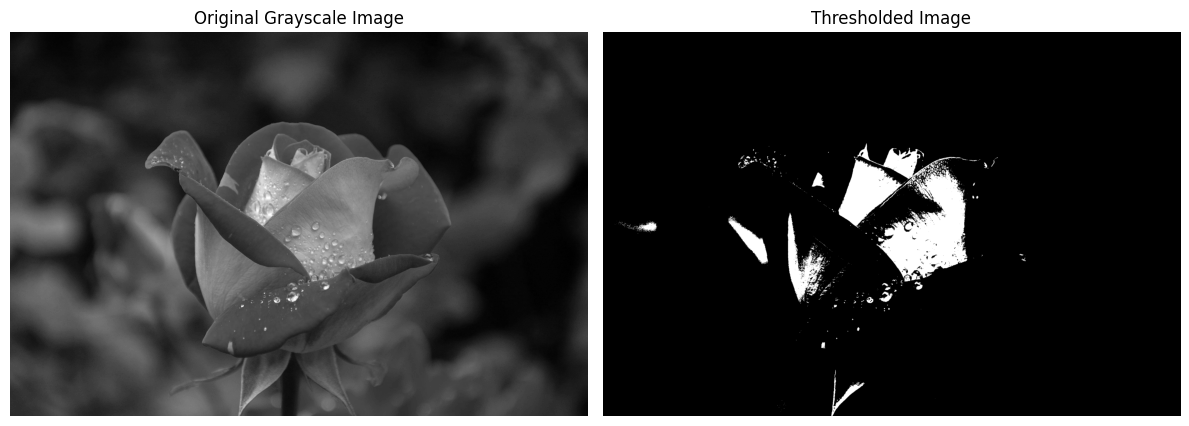

In [11]:
# Load the original image
image = cv2.imread('flower.jpeg')

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding
# Here, 127 is the threshold value, and 255 is the max value to use with the THRESH_BINARY thresholding type
_, thresholded_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# Display the original and thresholded images using Matplotlib
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(gray_image, cmap='gray')
axes[0].set_title('Original Grayscale Image')
axes[0].axis('off')

axes[1].imshow(thresholded_image, cmap='gray')
axes[1].set_title('Thresholded Image')
axes[1].axis('off')

plt.tight_layout()
plt.show()
